In [22]:
%matplotlib inline
import smact.lattice as lattice
import smact.builder as builder
import smact.core as core
import copy
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# get correct path for datafiles when called from another directory
smact_directory = '../../smact'
# Append a trailing slash to make coherent directory name - this would select the
# root directory in the case of no prefix, so we need to check
if smact_directory:
    smact_directory = smact_directory + '/'

In [3]:
site_A = lattice.Site([0,0,0],[+1,+2,+3])
site_B = lattice.Site([0.5,0.5,0.5],[+5,+4,+3,+2])
site_C = lattice.Site([0.5,0.5,0.5],[-2,-1])
perovskite = lattice.Lattice([site_A,site_B,site_C],space_group=221)

In [4]:
search = core.ordered_elements(3,87)

In [5]:
A_list = []
B_list = []
C_list = [['O',-2,1.35],['S',-2,1.84],['Se',-2,1.98],['F',-1,1.285],['Br',-1,1.96],['I',-1,2.2]]
for element in search:
    with open(smact_directory + 'data/shannon_radii.csv','rU') as f:
        reader = csv.reader(f)
        r_shannon=False
        for row in reader:
            if row[2]=="12_n" and row[0]==element and int(row[1]) in site_A.oxidation_states:
                A_list.append([row[0],row[1],row[4]])
            if row[2]=="6_n" and row[0]==element and int(row[1]) in site_B.oxidation_states:
                B_list.append([row[0],row[1],row[4]])



In [6]:
charge_balanced = []
goldschmidt_cubic = []
goldschmidt_ortho = []
a_too_large = []
A_B_similar = []
pauling_perov = []
anion_stats = []
for C in C_list:
    anion_hex = 0
    anion_cub = 0
    anion_ort = 0
    for B in B_list:
        for A in A_list:
            if B[0] != A[0]:        
                if C[0] != A[0] and C[0] != B[0]:
                    if int(A[1])+int(B[1])+3*int(C[1]) == 0:
                         charge_balanced.append([A[0],B[0],C[0]])
                         paul_a = core.Element(A[0]).pauling_eneg
                         paul_b = core.Element(B[0]).pauling_eneg
                         paul_c = core.Element(C[0]).pauling_eneg
                         electroneg_makes_sense = core.pauling_test([A[1],B[1],C[1]], [paul_a,paul_b,paul_c])
                         if electroneg_makes_sense:
                             pauling_perov.append([A[0],B[0],C[0]])
                         tol = (float(A[2]) + C[2])/(np.sqrt(2)*(float(B[2])+C[2]))
                         if tol > 1.0:
                            a_too_large.append([A[0],B[0],C[0]])
                            anion_hex = anion_hex+1
                         if tol > 0.9 and tol <= 1.0:
                            goldschmidt_cubic.append([A[0],B[0],C[0]])
                            anion_cub = anion_cub + 1
                         if tol >= 0.71 and tol < 0.9:
                            goldschmidt_ortho.append([A[0],B[0],C[0]])
                            anion_ort = anion_ort + 1
                         if tol < 0.71:
                            A_B_similar.append([A[0],B[0],C[0]])
    anion_stats.append([anion_hex,anion_cub,anion_ort]) 

[[184, 145, 107], [100, 159, 172], [87, 148, 196], [51, 43, 31], [12, 51, 62], [4, 54, 67]]


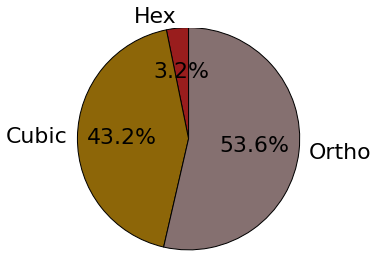

In [33]:
print anion_stats
colours=['#991D1D','#8D6608','#857070']
matplotlib.rcParams.update({'font.size': 22})
plt.pie(anion_stats[5],labels=['Hex','Cubic','Ortho']
        ,startangle=90,autopct='%1.1f%%',colors=colours)
plt.axis('equal')
plt.savefig('I-perovskites.png')

In [18]:


print 'Number of possible charge neutral perovskites from', search[0], 'to', search[len(search)-1], '=', len(charge_balanced)
print 'Number of Pauling senseibe perovskites from', search[0], 'to', search[len(search)-1], '=', len(pauling_perov)
print 'Number of possible cubic perovskites from', search[0], 'to', search[len(search)-1], '=', len(goldschmidt_cubic)
print 'Number of possible ortho perovskites from', search[0], 'to', search[len(search)-1], '=', len(goldschmidt_ortho)
print 'Number of possible hexagonal perovskites from', search[0], 'to', search[len(search)-1], '=', len(a_too_large)
print 'Number of possible non-perovskites from', search[0], 'to', search[len(search)-1], '=', len(A_B_similar)



Number of possible charge neutral perovskites from Li to Rn = 1673
Number of Pauling senseibe perovskites from Li to Rn = 192
Number of possible cubic perovskites from Li to Rn = 600
Number of possible ortho perovskites from Li to Rn = 635
Number of possible hexagonal perovskites from Li to Rn = 438
Number of possible non-perovskites from Li to Rn = 0


In [20]:
print goldschmidt_cubic

[['Na', 'Be', 'Br'], ['Na', 'Be', 'I'], ['Na', 'Mg', 'F'], ['Na', 'V', 'F'], ['Na', 'V', 'S'], ['Na', 'V', 'Se'], ['Na', 'Cr', 'F'], ['Na', 'Cr', 'S'], ['Na', 'Cr', 'Se'], ['Na', 'Mn', 'F'], ['Na', 'Fe', 'F'], ['Na', 'Co', 'F'], ['Na', 'Ni', 'F'], ['Na', 'Cu', 'F'], ['Na', 'Zn', 'F'], ['Na', 'Ge', 'F'], ['Na', 'As', 'S'], ['Na', 'As', 'Se'], ['Na', 'Nb', 'O'], ['Na', 'Nb', 'S'], ['Na', 'Nb', 'Se'], ['Na', 'Mo', 'O'], ['Na', 'Mo', 'S'], ['Na', 'Mo', 'Se'], ['Na', 'Tc', 'O'], ['Na', 'Tc', 'S'], ['Na', 'Tc', 'Se'], ['Na', 'Ru', 'S'], ['Na', 'Ru', 'Se'], ['Na', 'Rh', 'S'], ['Na', 'Rh', 'Se'], ['Na', 'Sb', 'O'], ['Na', 'Sb', 'S'], ['Na', 'Sb', 'Se'], ['Na', 'Ta', 'O'], ['Na', 'Ta', 'S'], ['Na', 'Ta', 'Se'], ['Na', 'W', 'O'], ['Na', 'W', 'S'], ['Na', 'W', 'Se'], ['Na', 'Re', 'S'], ['Na', 'Re', 'Se'], ['Na', 'Os', 'S'], ['Na', 'Os', 'Se'], ['Na', 'Ir', 'S'], ['Na', 'Ir', 'Se'], ['Na', 'Pt', 'F'], ['Na', 'Pt', 'S'], ['Na', 'Pt', 'Se'], ['Na', 'Au', 'S'], ['Na', 'Au', 'Se'], ['Na', 'Bi', 'O'], 